In [1]:
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy = True

# pyEPR Startup Example
##### Single transmon qubit mode analysis  
Author: Zlatko Minev

## <div style="background:#BBFABB;line-height:2em;">Load pyEPR<div>

In [2]:
import pyEPR as epr
import matplotlib.pylab as plt
import numpy as np
import pyEPR.calcs
from pyEPR.calcs import Convert

This loads the `pyEPR` package under the shorthand name `epr`.

We can access the main different submodules, like this:
  * `epr.calcs`  : calculations tools 
  * `epr.ansys`  : tools for controlling ansys hfss, q3d, etc.
  * `epr.toolbox`: useful and handly toolbox for plotting, pythonic manipulations, etc. 
  * `epr.core`  : The core module of analysis functions. This does not need ot be accessed by the user typically. It essentually provides the main two classes: ProjectInfo, DistributedAnalysis, and QuantumAnalysis -- which represent the different stages of the simulation. Let us examine these next. 
  
EPR also has some handy functions, which we will explore:

In [3]:
print('Parsing unis:  1um =', 
      epr.parse_entry('1um', 'meters'), 'meters')

print(f"""For   L_J = 11 nH, the Josephson junction energy is
      E_J = {epr.calcs.Convert.Ej_from_Lj(11, 'nH', 'GHz'):.1f} GHz""")

Parsing unis:  1um = 1e-06 meters
For   L_J = 11 nH, the Josephson junction energy is
      E_J = 14.9 GHz


#### Load Ansys HFSS tutorial file  

Let us first determine where the example file is stored.
For tutorial, let us get the path to the tutorial folder.

In [4]:
# Load Path temporarily just to find where the tutorial folder is
# return path_to_project
from pathlib import Path
path_to_project = Path(epr.__file__).parent.parent / '_example_files'
print(f'We will the example project located in\n {path_to_project}')

We will the example project located in
 C:\Miniconda\envs\virenv\lib\site-packages\_example_files


## <div style="background:#BBFABB;line-height:2em;">Connect to Ansys HFSS<div>

Now, we will open Ansys Desktop and connect to a specific project.

You can use the following creation keyword arguments to specify which design to look at 

 * `project_path`: 
    Directory path to the hfss project file. Should be the directory, not the file.
    default = None: Assumes the project is open, and thus gets the project based on `project_name`
 * `project_name`:
    Name of the project within the project_path. "None" will get the current active one.
 * `design_name` :
    Name of the design within the project. "None" will get the current active one.
 * `setup_name`  :
    Name of the setup within the design. "None" will get the current active one.

Use `?epr.ProjectInfo` to see all the arguments

In [3]:
path_to_project = r'C:\Users\Lehnert Lab\Documents\Sheng-Xiang\Cavity_design'
pinfo = epr.ProjectInfo(project_path = path_to_project, 
                         project_name = 'DualCavity',
                         design_name  = 'L Two Post Memory with a sapphire rod_eigenmode_gen5')

INFO 12:37AM [connect_project]: Connecting to Ansys Desktop API...
INFO 12:37AM [load_ansys_project]: 	File path to HFSS project found.
INFO 12:37AM [load_ansys_project]: 	Opened Ansys App
INFO 12:37AM [load_ansys_project]: 	Opened Ansys Desktop v2021.2.0
INFO 12:37AM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/Lehnert Lab/Documents/Sheng-Xiang/Cavity_design/
	Project:   DualCavity
INFO 12:37AM [connect_design]: 	Opened active design
	Design:    L Two Post Memory with a sapphire rod_eigenmode_gen5 [Solution type: Eigenmode]
INFO 12:37AM [get_setup]: 	Opened setup `Setup1`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 12:37AM [connect]: 	Connected to project "DualCavity" and design "L Two Post Memory with a sapphire rod_eigenmode_gen5" 😀 



Let's see what the design type was using the `design` object

In [6]:
pinfo.design.solution_type

'Eigenmode'

Let us see what all the object in the design are. `pinfo` contains a function to retrieve these for convenience.

In [7]:
pinfo.get_all_object_names()

['Cavity1',
 'SapphireRod',
 'SMA_RO_pin1',
 'SMA_RO_pin2',
 'SMA_Storage_pin',
 'QubitSapphire',
 'rect_jj1',
 'RO_pin2_1',
 'RO_pin1_1',
 'Storage_pin_1',
 'Rectangle7',
 'TransmonPad1_finger',
 'TransmonPad2',
 'TranmonPad2_finger',
 'TransmonPad1',
 'line_jj1']

Let's see what variables there are in the design. 

In [8]:
pinfo.get_all_variables_names()

['$sappTand',
 '$boxZ',
 '$cavityHeight',
 '$boxY',
 '$boxX',
 '$boxHeight',
 '$coaxRad',
 '$coaxHeight',
 '$port2Len',
 '$portLen',
 '$coaxOffset',
 '$port2offset',
 '$port1Offset',
 '$pin2len',
 '$pin1len',
 '$cavityRadius',
 '$rodOffset',
 '$rodRad',
 '$qubitHole',
 '$qubSapZ',
 '$qubSapThick',
 '$qubitCentDist',
 '$padHeight',
 '$padLen',
 '$fingerHeight',
 '$fingerLen',
 '$junctionLen',
 '$LJ',
 '$qubHoleOffset',
 '$portRadius',
 'cavityRadius',
 'cavityHeight',
 'coaxRad',
 'coaxHeight',
 'qubSapThick',
 'qubSapZ',
 'qubHoleOffset',
 'qubitHole',
 'qubitCentDist',
 'fingerLen',
 'junctionLen',
 'fingerHeight',
 'padHeight',
 'padLen',
 'LJ',
 'smallfingerlen',
 'smallfingerheight',
 'actualJunctionLen',
 'actualJunctionHeight',
 'rodOffset',
 'rodRad',
 'padHeight2',
 'pin2Len',
 'pin1Len',
 'cavitySep',
 'CenterOffset',
 'coaxHeightStorage',
 'PinHoleRadius',
 'PinPos',
 'pinStorageLen',
 'SMAPinRadius',
 'RO_elevated',
 'HoleDepth',
 'PadOffset']

We can also get the names of the setups

In [9]:
pinfo.design.get_setup_names()

('Setup1',)

We can also get information such as mesh statistic and convergence (if you have already solved the model)

In [10]:
pinfo.setup.get_mesh_stats()

ERROR in MESH reading operation.
No columns to parse from file
ERROR!  Error in trying to read temporary MESH file C:\Users\LEHNER~2\AppData\Local\Temp\tmp1u592p4q
. Check to see if there is a mesh available for this current variation.                   If the nominal design is not solved, it will not have a mesh.,                    but will show up as a variation.


We can also see how many modes we solved for

In [11]:
pinfo.setup.n_modes

'5'

##  <div style="background:#BBFABB;line-height:2em;"> Josephson tunnel junctions (non-linear elemetns) </div>

To analysze the quantum part of the model, let us specify the junctions in the model. 

The junciton is defined as described in the paper and on the landing page of pyEPR. There is a rectangle sheet inductance and a polyline that defines the current and voltage on the sheet.  

Let us call the single junction `j1`. A junction has the following properties:

  1. **Lj_variable** : Name of HFSS variable that specifies junction inductance Lj defined on the boundary condition in HFSS
  2. **rect**        : Name of HFSS rectangle on which lumped boundary condition is specified.
  3. **line**        : Name of HFSS polyline which spans the length of the recntalge. Used to define the voltage across the junction. 
  4. **Cj_variable** : (Optional) Name of HFSS variable that specifies junction lumped capacitance Cj defined on the boundary condition in HFSS. This is optional.

In [13]:
pinfo.junctions['j1'] = {'Lj_variable' : 'LJ', 
                         'rect'        : 'rect_jj1', 
                         'line'        : 'line_jj1', 
                         'length'      : epr.parse_units('10um')}


# Check that valid names of variables and objects have been supplied.
# An error is raised with a message if something is wrong.
pinfo.validate_junction_info()  

## <div style="background:#BBFABB;line-height:2em;">Micrwoave Analysis: <br>Run analysis on an eigenmode solution  <div>

Assumeing we have field solutions saved for the HFSS *eigenmode* design, we can now create the analysis object from the 
calss `DistributedAnalysis`.

**Run analysis:** (Tutorial action) Run the analysis in the design model. 
This can be done manually, or using pyEPR.

In [33]:
# Calling this function will run an analysis of the design in the background. 
# The console will wait for HFSS to complete.
pinfo.setup.analyze()

INFO 02:52PM [analyze]: Analyzing setup Setup1


**Run optimetrics**

The following will get the frequencies and Qs from HFSS. 

In [4]:
# Calling this function will run an analysis on all the optimetrics  the design in the background. 
# The console will wait for HFSS to complete.
# This requires optimetrics license by HFSS. 
pinfo.design.optimetrics.solve_setup(pinfo.design.optimetrics.get_setup_names()[0])

**EPR Analysis object**

Let us introduce the core analysis object of `pyEPR`, which will be a class instance of `epr.DistributedAnalysis`. This is how we will run most of our analysis.

Let us recover the eigenmode frequencies of the first variation we ran, which is indexed by '0'.

In [5]:
# This is the core object for interacting with HFSS
# and running analysis within HFSS.
eprh = epr.DistributedAnalysis(pinfo) # epr hfss analysis 

ERROR 03:10AM [setup_data]: WARNING!   DESIGN FILENAME MAY BE TOO LONG! 


Design "L Two Post Memory with a sapphire rod_eigenmode_gen5" info:
	# eigenmodes    4
	# variations    18


In [6]:
eprh.get_ansys_variables()

variation,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
$boxHeight,200mm,200mm,200mm,200mm,200mm,200mm,200mm,200mm,200mm,200mm,200mm,200mm,200mm,200mm,200mm,200mm,200mm,200mm
$boxX,30mm,30mm,30mm,30mm,30mm,30mm,30mm,30mm,30mm,30mm,30mm,30mm,30mm,30mm,30mm,30mm,30mm,30mm
$boxY,30mm,30mm,30mm,30mm,30mm,30mm,30mm,30mm,30mm,30mm,30mm,30mm,30mm,30mm,30mm,30mm,30mm,30mm
$boxZ,80mm,80mm,80mm,80mm,80mm,80mm,80mm,80mm,80mm,80mm,80mm,80mm,80mm,80mm,80mm,80mm,80mm,80mm
$cavityHeight,40mm,40mm,40mm,40mm,40mm,40mm,40mm,40mm,40mm,40mm,40mm,40mm,40mm,40mm,40mm,40mm,40mm,40mm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rodRad,2mm,2mm,2mm,2mm,2mm,2mm,2mm,2mm,2mm,2mm,2mm,2mm,2mm,2mm,2mm,2mm,2mm,2mm
ROpin2Len,9.2599999999999998mm,9.2599999999999998mm,9.2599999999999998mm,9.2599999999999998mm,9.2599999999999998mm,9.2599999999999998mm,9.2599999999999998mm,9.2599999999999998mm,9.2599999999999998mm,9.2599999999999998mm,9.2599999999999998mm,9.2599999999999998mm,9.2599999999999998mm,9.2599999999999998mm,9.2599999999999998mm,9.2599999999999998mm,9.2599999999999998mm,9.2599999999999998mm
smallfingerheight,0.0001mm,0.0001mm,0.0001mm,0.0001mm,0.0001mm,0.0001mm,0.0001mm,0.0001mm,0.0001mm,0.0001mm,0.0001mm,0.0001mm,0.0001mm,0.0001mm,0.0001mm,0.0001mm,0.0001mm,0.0001mm
smallfingerlen,0.0024499999999999999mm,0.0024499999999999999mm,0.0024499999999999999mm,0.0024499999999999999mm,0.0024499999999999999mm,0.0024499999999999999mm,0.0024499999999999999mm,0.0024499999999999999mm,0.0024499999999999999mm,0.0024499999999999999mm,0.0024499999999999999mm,0.0024499999999999999mm,0.0024499999999999999mm,0.0024499999999999999mm,0.0024499999999999999mm,0.0024499999999999999mm,0.0024499999999999999mm,0.0024499999999999999mm


In [7]:
eprh.get_ansys_frequencies_all()

Freq. (GHz)  Quality Factor
variation mode                             
0         0        4.053849    1.089176e+07
          1        5.046665    1.535293e+08
          2        5.538728    1.667309e+04
          3       10.335334    5.036233e+04
1         0        4.042264    1.322242e+07
...                     ...             ...
16        3       10.335764    4.903764e+04
17        0        4.078617    1.316353e+07
          1        5.040214    1.739428e+08
          2        5.539197    1.664059e+04
          3       10.336222    4.116921e+04

[72 rows x 2 columns]

INFO 03:10AM [hfss_report_full_convergence]: Creating report for variation 0
C:\Miniconda\envs\virenv\lib\site-packages\pyEPR\ansys.py:1225: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  index_col=0).drop('Unnamed: 3', 1)
INFO 03:10AM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen5\hfss_eig_f_convergence.csv


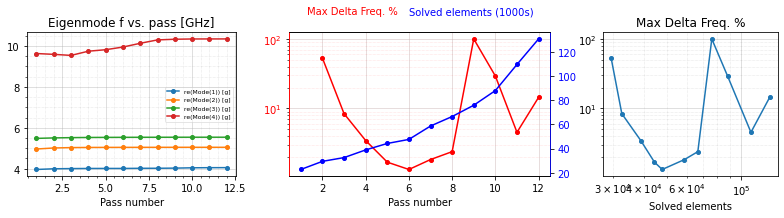

INFO 03:11AM [hfss_report_full_convergence]: Creating report for variation 1
C:\Miniconda\envs\virenv\lib\site-packages\pyEPR\ansys.py:1225: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  index_col=0).drop('Unnamed: 3', 1)
INFO 03:11AM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen5\hfss_eig_f_convergence.csv


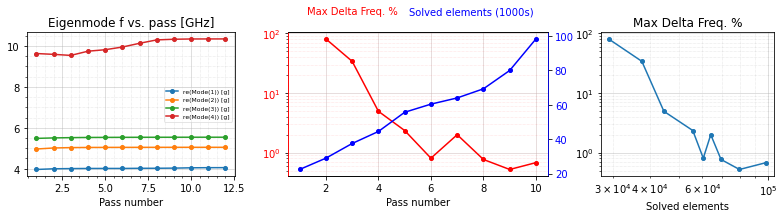

INFO 03:11AM [hfss_report_full_convergence]: Creating report for variation 2
C:\Miniconda\envs\virenv\lib\site-packages\pyEPR\ansys.py:1225: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  index_col=0).drop('Unnamed: 3', 1)
INFO 03:11AM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen5\hfss_eig_f_convergence.csv


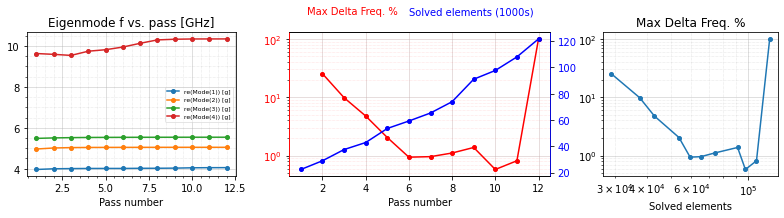

INFO 03:11AM [hfss_report_full_convergence]: Creating report for variation 3
C:\Miniconda\envs\virenv\lib\site-packages\pyEPR\ansys.py:1225: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  index_col=0).drop('Unnamed: 3', 1)
INFO 03:11AM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen5\hfss_eig_f_convergence.csv


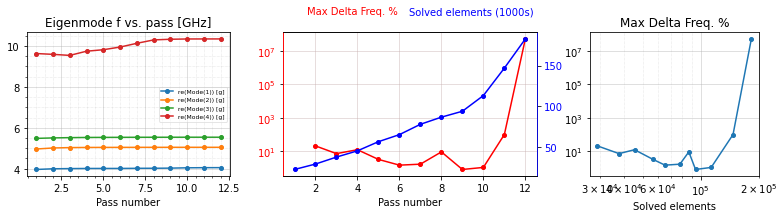

INFO 03:11AM [hfss_report_full_convergence]: Creating report for variation 4
C:\Miniconda\envs\virenv\lib\site-packages\pyEPR\ansys.py:1225: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  index_col=0).drop('Unnamed: 3', 1)
INFO 03:11AM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen5\hfss_eig_f_convergence.csv


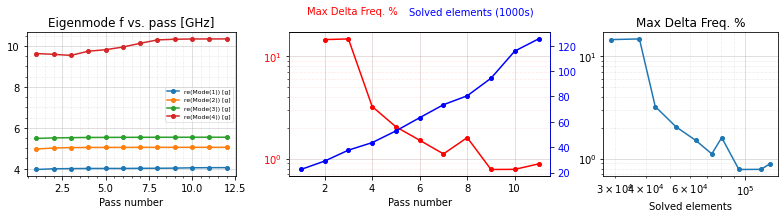

INFO 03:11AM [hfss_report_full_convergence]: Creating report for variation 5
C:\Miniconda\envs\virenv\lib\site-packages\pyEPR\ansys.py:1225: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  index_col=0).drop('Unnamed: 3', 1)
INFO 03:11AM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen5\hfss_eig_f_convergence.csv


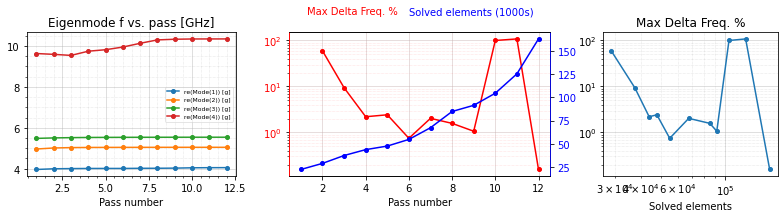

INFO 03:11AM [hfss_report_full_convergence]: Creating report for variation 6
C:\Miniconda\envs\virenv\lib\site-packages\pyEPR\ansys.py:1225: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  index_col=0).drop('Unnamed: 3', 1)
INFO 03:11AM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen5\hfss_eig_f_convergence.csv


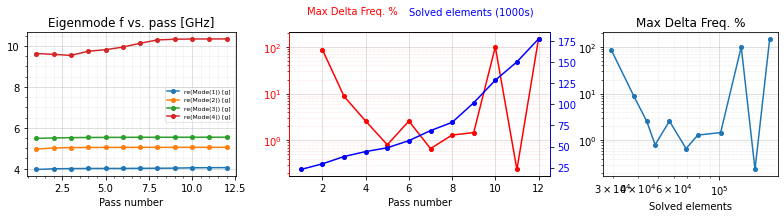

INFO 03:11AM [hfss_report_full_convergence]: Creating report for variation 7
C:\Miniconda\envs\virenv\lib\site-packages\pyEPR\ansys.py:1225: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  index_col=0).drop('Unnamed: 3', 1)
INFO 03:11AM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen5\hfss_eig_f_convergence.csv


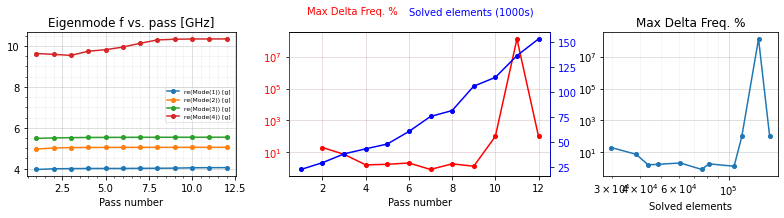

INFO 03:11AM [hfss_report_full_convergence]: Creating report for variation 8
C:\Miniconda\envs\virenv\lib\site-packages\pyEPR\ansys.py:1225: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  index_col=0).drop('Unnamed: 3', 1)
INFO 03:11AM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen5\hfss_eig_f_convergence.csv


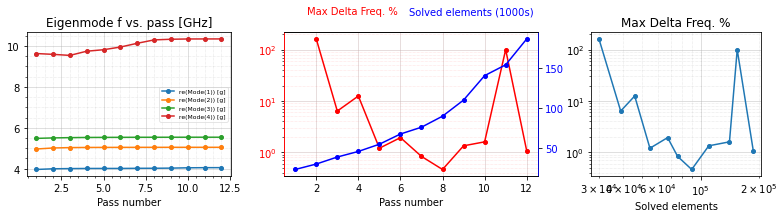

INFO 03:11AM [hfss_report_full_convergence]: Creating report for variation 9
C:\Miniconda\envs\virenv\lib\site-packages\pyEPR\ansys.py:1225: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  index_col=0).drop('Unnamed: 3', 1)
INFO 03:11AM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen5\hfss_eig_f_convergence.csv


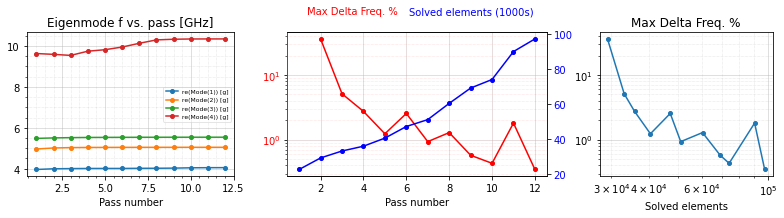

INFO 03:11AM [hfss_report_full_convergence]: Creating report for variation 10
C:\Miniconda\envs\virenv\lib\site-packages\pyEPR\ansys.py:1225: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  index_col=0).drop('Unnamed: 3', 1)
INFO 03:11AM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen5\hfss_eig_f_convergence.csv


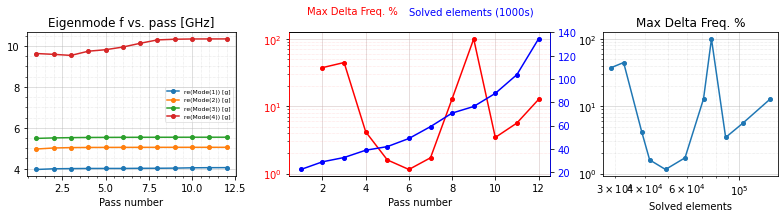

INFO 03:11AM [hfss_report_full_convergence]: Creating report for variation 11
C:\Miniconda\envs\virenv\lib\site-packages\pyEPR\ansys.py:1225: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  index_col=0).drop('Unnamed: 3', 1)
INFO 03:11AM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen5\hfss_eig_f_convergence.csv


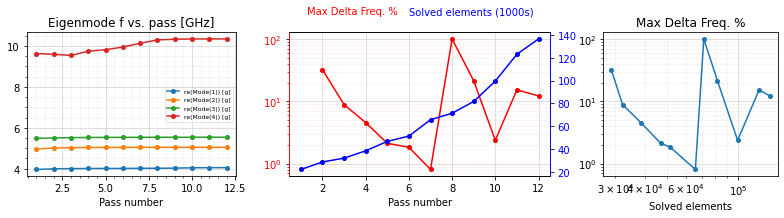

INFO 03:11AM [hfss_report_full_convergence]: Creating report for variation 12
C:\Miniconda\envs\virenv\lib\site-packages\pyEPR\ansys.py:1225: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  index_col=0).drop('Unnamed: 3', 1)
INFO 03:12AM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen5\hfss_eig_f_convergence.csv


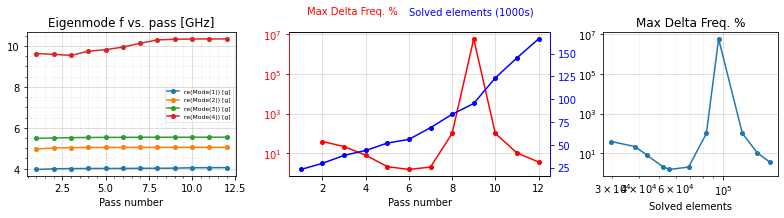

INFO 03:12AM [hfss_report_full_convergence]: Creating report for variation 13
C:\Miniconda\envs\virenv\lib\site-packages\pyEPR\ansys.py:1225: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  index_col=0).drop('Unnamed: 3', 1)
INFO 03:12AM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen5\hfss_eig_f_convergence.csv


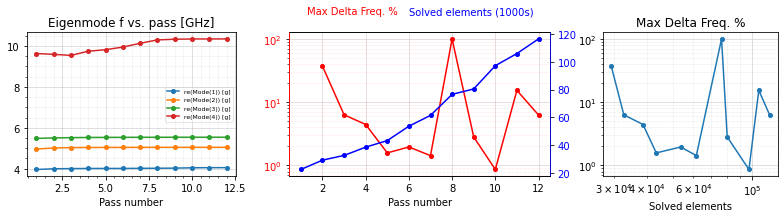

INFO 03:12AM [hfss_report_full_convergence]: Creating report for variation 14
C:\Miniconda\envs\virenv\lib\site-packages\pyEPR\ansys.py:1225: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  index_col=0).drop('Unnamed: 3', 1)
INFO 03:12AM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen5\hfss_eig_f_convergence.csv


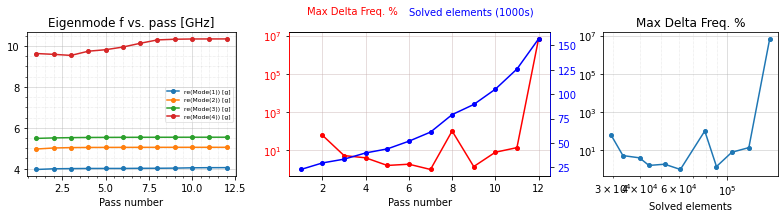

INFO 03:12AM [hfss_report_full_convergence]: Creating report for variation 15
C:\Miniconda\envs\virenv\lib\site-packages\pyEPR\ansys.py:1225: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  index_col=0).drop('Unnamed: 3', 1)
INFO 03:12AM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen5\hfss_eig_f_convergence.csv


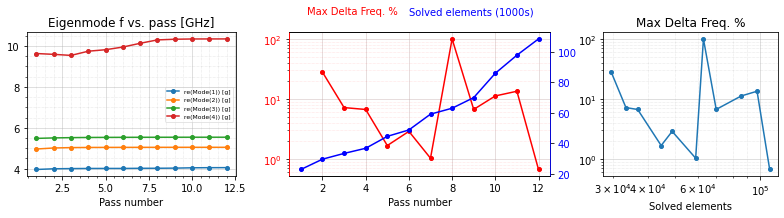

INFO 03:12AM [hfss_report_full_convergence]: Creating report for variation 16
C:\Miniconda\envs\virenv\lib\site-packages\pyEPR\ansys.py:1225: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  index_col=0).drop('Unnamed: 3', 1)
INFO 03:12AM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen5\hfss_eig_f_convergence.csv


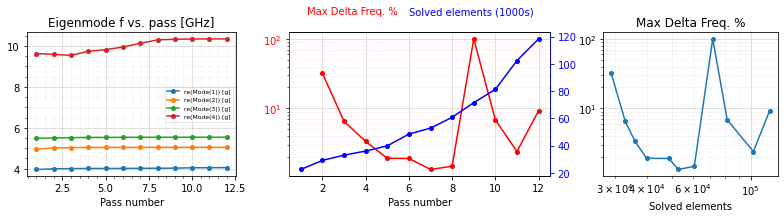

INFO 03:12AM [hfss_report_full_convergence]: Creating report for variation 17
C:\Miniconda\envs\virenv\lib\site-packages\pyEPR\ansys.py:1225: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  index_col=0).drop('Unnamed: 3', 1)
INFO 03:12AM [hfss_report_f_convergence]: Saved convergences to C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen5\hfss_eig_f_convergence.csv


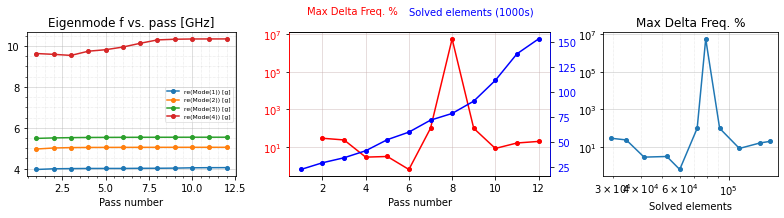

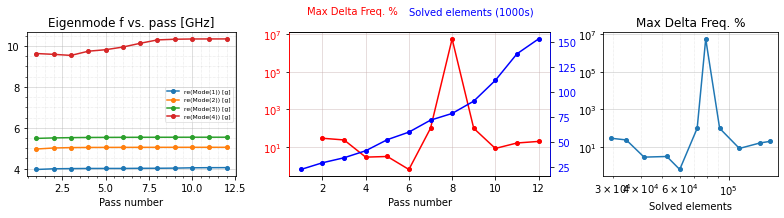

In [8]:
eprh.hfss_report_full_convergence();

We can see that the convergence wasn't actually terrific, though we only used 60,000 tets. However, there seems to be a divergence above 15 passes in this example. We will probably need to change our mesh operations to create a monotonic convergence.

However, for the purpose of the tutorial, let us press forward. 

You can use these autogenerated reports to keep track of your simulations.
This is still all at the clasical level. Take a look at the other methods, including
 * `hfss_report_full_convergence`
 * `hfss_report_f_convergence`
 * `get_convergence`
 * `get_mesh_statistics`
 * `get_freqs_bare_pd`
 * ...
 
For example, you can get tables of the freqs and Qs using 
```python
Fs, Qs = eprh.get_freqs_bare_pd(variation='0')
```

In [11]:
import pandas as pd
for variation in eprh.variations: # just for the first 2
    Fs, Qs = eprh.get_freqs_bare_pd(variation=variation, frame=False)
    display(pd.DataFrame({'Freq. (GHz)':Fs, 'Quality Factor':Qs}))

,Freq. (GHz),Quality Factor
0,4.053849,1.089176e+07
1,5.046665,1.535293e+08
2,5.538728,1.667309e+04
3,10.335334,5.036233e+04


,Freq. (GHz),Quality Factor
0,4.042264,1.322242e+07
1,5.047023,2.056397e+08
2,8.035818,8.035680e+03
3,10.430106,7.483490e-01


,Freq. (GHz),Quality Factor
0,4.082741,1.293493e+07
1,5.050671,1.519043e+08
2,8.034964,8.124608e+03
3,10.607758,3.937506e+06


,Freq. (GHz),Quality Factor
0,4.088483,1.302595e+07
1,5.050523,1.303777e+08
2,8.036688,8.111054e+03
3,10.609523,7.496872e-01


,Freq. (GHz),Quality Factor
0,4.066024,1.313390e+07
1,5.048881,1.575112e+08
2,8.035977,8.165866e+03
3,10.592591,7.493783e-01


,Freq. (GHz),Quality Factor
0,4.069477,1.325457e+07
1,5.046275,1.657596e+08
2,8.038244,8.092108e+03
3,10.648972,4.126998e+06


,Freq. (GHz),Quality Factor
0,4.066155,1.331215e+07
1,5.045423,1.332544e+08
2,8.038796,8.131608e+03
3,10.647812,1.484175e+06


,Freq. (GHz),Quality Factor
0,4.078041,1.334404e+07
1,5.043102,1.817551e+08
2,8.039160,8.095578e+03
3,10.644676,1.208449e+06


,Freq. (GHz),Quality Factor
0,4.090868,1.338197e+07
1,5.042461,1.191021e+08
2,8.039812,8.098536e+03
3,10.641591,7.039525e+06


,Freq. (GHz),Quality Factor
0,4.077283,1.343892e+07
1,5.040107,1.097246e+08
2,8.037958,8.122293e+03
3,10.591591,7.542822e-01


,Freq. (GHz),Quality Factor
0,4.068394,7.879230e+06
1,5.050014,1.096138e+08
2,5.539815,1.667604e+04
3,10.334783,4.451069e+04


,Freq. (GHz),Quality Factor
0,4.050349,9.022091e+06
1,5.049231,2.100886e+08
2,5.538677,1.664482e+04
3,10.335539,5.185198e+04


,Freq. (GHz),Quality Factor
0,4.072105,9.883378e+06
1,5.048738,1.705800e+08
2,5.539912,1.671945e+04
3,10.335223,4.957474e+04


,Freq. (GHz),Quality Factor
0,4.033175,1.171569e+07
1,5.044726,1.865972e+08
2,5.537379,1.666776e+04
3,10.335464,4.576443e+04


,Freq. (GHz),Quality Factor
0,4.062227,1.220344e+07
1,5.043756,5.214557e+07
2,5.538296,1.663116e+04
3,10.332145,7.428588e-01


,Freq. (GHz),Quality Factor
0,4.042716,1.268705e+07
1,5.040018,8.625435e+07
2,5.537681,1.659444e+04
3,10.336207,4.700226e+04


,Freq. (GHz),Quality Factor
0,4.071367,1.294588e+07
1,5.039231,1.964258e+08
2,5.538755,1.666119e+04
3,10.335764,4.903764e+04


,Freq. (GHz),Quality Factor
0,4.078617,1.316353e+07
1,5.040214,1.739428e+08
2,5.539197,1.664059e+04
3,10.336222,4.116921e+04


The Q is infinite, since we have not included dissipation yet in this example. The row index is the mode number

####  Full analysis

Let's now jump ahead to the full analysis.

In [15]:
eprh.do_EPR_analysis();


Variation 0  [1/18]
  previously analyzed ...

Variation 1  [2/18]

  Mode 0 at 4.04 GHz   [1/4]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               94.2%  1.924e-24 1.123e-25

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 97.93%
	j1              0.941603  (+)        0.0199107
		(U_tot_cap-U_tot_ind)/mean=0.99%

  Mode 1 at 5.05 GHz   [2/4]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.1%  2.067e-21 2.066e-21

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_1j   sign s_1j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 96.81%
	j1              0.000582798  (+)        1.92113e-05
		(U_tot_cap-U_tot_ind)/mean=0.00%

  Mode 2 at 8.04 GHz   [3/4]
    Calculating ℰ_magnetic,ℰ_el


  Mode 1 at 5.05 GHz   [2/4]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.1%  4.804e-22 4.799e-22

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_1j   sign s_1j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 96.81%
	j1              0.00104454  (+)        3.44221e-05
		(U_tot_cap-U_tot_ind)/mean=0.00%

  Mode 2 at 8.04 GHz   [3/4]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.0%  2.851e-22 2.851e-22

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_2j   sign s_2j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 92.28%
	j1              0.000185534  (+)        1.55137e-05
		(U_tot_cap-U_tot_ind)/mean=0.00%

  Mode 3 at 10.65 GHz   [4/4]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               

		Energy fraction (Lj over Lj&Cj)= 87.32%
	j1              4.46191e-10  (+)        6.47757e-11
		(U_tot_cap-U_tot_ind)/mean=-18.01%

Variation 10  [11/18]

  Mode 0 at 4.07 GHz   [1/4]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               93.8%  1.299e-24 8.041e-26

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 97.90%
	j1              0.937095  (+)        0.0200724
		(U_tot_cap-U_tot_ind)/mean=1.04%

  Mode 1 at 5.05 GHz   [2/4]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.0%  9.089e-21 9.088e-21

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_1j   sign s_1j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 96.81%
	j1              9.16713e-05  (+)        3.02543e-06
		(U_tot_

		Energy fraction (Lj over Lj&Cj)= 96.81%
	j1              0.00168076  (+)        5.53327e-05
		(U_tot_cap-U_tot_ind)/mean=0.00%

  Mode 2 at 5.54 GHz   [3/4]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.0%  8.744e-22  8.74e-22

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_2j   sign s_2j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 96.18%
	j1              0.000432417  (+)        1.71642e-05
		(U_tot_cap-U_tot_ind)/mean=0.00%

  Mode 3 at 10.33 GHz   [4/4]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
              -45.3%  2.101e-26 3.053e-26

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_3j   sign s_3j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 87.86%
	j1              1.83706e-09  (+)        2.5379e-10
		(U_tot_cap-U_tot_ind)/mean=-

##### Getting more info

In general, to see more info when running commands , set the logger level

In [ ]:
import logging
epr.logger.setLevel(logging.DEBUG)

## <div style="background:#BBFABB;line-height:2em;"> Quantum Hamiltonian Analysis:<br> Load mw-analysis results and perform hamiltonian analysis on the solutions  <div>

We will now postprocess the mw analysis to obtain the quantum Hamiltonian. 

The code object of postprocessing is `epra`, an instance of `epr.QuantumAnalysis`.

In [16]:
%matplotlib inline
# plot the figures in the notebook. 

# This is the core object for working with post processing data from HFSS
# This iwll load the saved solutions from above
# file = r'C:\data-pyEPR\DualCavity\L Two Post Memory with a sapphire rod_eigenmode_gen3\2022-01-18 11-26-20.npz'
epra = epr.QuantumAnalysis(eprh.data_filename)

# Analyze 
result = epra.analyze_all_variations(cos_trunc = 8, fock_trunc = 4)

	 Differences in variations:


variation,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
_CenterOffset,-0.25mm,-0.25mm,-1mm,-0.75mm,-0.5mm,0mm,0.25mm,0.5mm,0.75mm,1mm,-1mm,-0.75mm,-0.5mm,0mm,0.25mm,0.5mm,0.75mm,1mm
_rodOffset,0mm,5mm,5mm,5mm,5mm,5mm,5mm,5mm,5mm,5mm,0mm,0mm,0mm,0mm,0mm,0mm,0mm,0mm





 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    1.021672
1    1.017022
2    1.020402
3    0.967414
dtype: float64

Pm_norm idx =
      j1
0   True
1  False
2  False
3  False

*** Different parameters


_CenterOffset    -0.25mm
_rodOffset           0mm
Name: 0, dtype: object

ERROR 08:30PM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 36.5% is > 15%.                     
Is the simulation converged? Proceed with caution




*** P (participation matrix, not normlz.)
         j1
0  0.921013
1  0.000593
2  0.001036
3  0.000025

*** S (sign-bit matrix)
   s_j1
0     1
1     1
2     1
3     1
*** P (participation matrix, normalized.)
      0.94
   0.00059
     0.001
   2.5e-05

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       182    0.286    0.549   0.0249
     0.286 0.000112 0.000431 1.96e-05
     0.549 0.000431 0.000413 3.75e-05
    0.0249 1.96e-05 3.75e-05  8.5e-07

*** Chi matrix ND (MHz) 
     -11.3    0.161    0.376   0.0216
     0.161-7.88e-05 0.000242 1.43e-05
     0.376 0.000242-0.000226 3.01e-05
    0.0216 1.43e-05 3.01e-05-1.21e-07

*** Frequencies O1 PT (MHz)
0     3871.044457
1     5046.521310
2     5538.453317
3    10335.321187
dtype: float64

*** Frequencies ND (MHz)
0     3873.503311
1     5046.538654
2     5538.473631
3    10335.320519
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]

 . . . . . . . . . . . . . . . . . . 

ERROR 08:30PM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 36.5% is > 15%.                     
Is the simulation converged? Proceed with caution


Pm_norm=
modes
0    1.020597e+00
1    1.016524e+00
2    1.041815e+00
3    4.089251e+07
dtype: float64

Pm_norm idx =
      j1
0   True
1  False
2  False
3  False

*** Different parameters


_CenterOffset    -0.25mm
_rodOffset           5mm
Name: 1, dtype: object



*** P (participation matrix, not normlz.)
             j1
0  9.232211e-01
1  5.827870e-04
2  2.775994e-04
3  4.462323e-09

*** S (sign-bit matrix)
   s_j1
0     1
1     1
2     1
3     1
*** P (participation matrix, normalized.)
      0.94
   0.00058
   0.00028
   4.5e-09

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       182    0.281    0.213 4.44e-06
     0.281 0.000108 0.000164 3.43e-09
     0.213 0.000164 6.24e-05  2.6e-09
  4.44e-06 3.43e-09  2.6e-09 2.72e-14

*** Chi matrix ND (MHz) 
     -11.3    0.159    0.181 3.85e-06
     0.159-7.53e-05 0.000111 2.53e-09
     0.181 0.000111-1.54e-05 2.32e-09
  3.85e-06 2.53e-09 2.32e-09-1.03e-10

*** Frequencies O1 PT (MHz)
0     3860.196540
1     5046.881968
2     8035.711635
3    10430.105547
dtype: float64

*** Frequencies ND (MHz)
0     3862.680370
1     5046.898716
2     8035.711524
3    10430.105547
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]

 . . . . . . . . 

_CenterOffset    -1mm
_rodOffset        5mm
Name: 2, dtype: object

ERROR 08:30PM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 36.4% is > 15%.                     
Is the simulation converged? Proceed with caution




*** P (participation matrix, not normlz.)
         j1
0  0.921364
1  0.000094
2  0.000828
3  0.000002

*** S (sign-bit matrix)
   s_j1
0     1
1     1
2     1
3     1
*** P (participation matrix, normalized.)
      0.94
   9.4e-05
   0.00083
   2.3e-06

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       185    0.046    0.641  0.00237
     0.046 2.85e-06 7.95e-05 2.94e-07
     0.641 7.95e-05 0.000555 4.11e-06
   0.00237 2.94e-07 4.11e-06  7.6e-09

*** Chi matrix ND (MHz) 
     -11.7   0.0251    0.544  0.00205
    0.0251-2.05e-06 5.26e-05 2.16e-07
     0.544 5.26e-05-0.000141  3.7e-06
   0.00205 2.16e-07  3.7e-06-1.02e-09

*** Frequencies O1 PT (MHz)
0     3897.289772
1     5050.648312
2     8034.643386
3    10607.757182
dtype: float64

*** Frequencies ND (MHz)
0     3899.856422
1     5050.651223
2     8034.643499
3    10607.757107
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]

 . . . . . . . . . . . . . . . . . . 

ERROR 08:30PM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 36.4% is > 15%.                     
Is the simulation converged? Proceed with caution


Pm_norm=
modes
0    1.021367e+00
1    1.016701e+00
2    1.042015e+00
3    2.078022e+07
dtype: float64

Pm_norm idx =
      j1
0   True
1  False
2  False
3  False

*** Different parameters


_CenterOffset    -0.75mm
_rodOffset           5mm
Name: 3, dtype: object

ERROR 08:30PM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 36.4% is > 15%.                     
Is the simulation converged? Proceed with caution




*** P (participation matrix, not normlz.)
             j1
0  9.216566e-01
1  1.892234e-04
2  5.996064e-04
3  8.755349e-09

*** S (sign-bit matrix)
   s_j1
0     1
1     1
2     1
3     1
*** P (participation matrix, normalized.)
      0.94
   0.00019
    0.0006
   8.8e-09

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       186   0.0922    0.465 8.96e-06
    0.0922 1.14e-05 0.000115 2.23e-09
     0.465 0.000115 0.000291 1.12e-08
  8.96e-06 2.23e-09 1.12e-08 1.08e-13

*** Chi matrix ND (MHz) 
     -11.7   0.0501    0.394 7.74e-06
    0.0501-8.26e-06 7.61e-05  1.5e-09
     0.394 7.61e-05-7.41e-05 1.01e-08
  7.74e-06  1.5e-09 1.01e-08-1.53e-10

*** Frequencies O1 PT (MHz)
0     3902.552537
1     5050.476774
2     8036.455186
3    10609.522647
dtype: float64

*** Frequencies ND (MHz)
0     3905.132816
1     5050.482669
2     8036.455306
3    10609.522647
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]

 . . . . . . . . 

ERROR 08:30PM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 36.4% is > 15%.                     
Is the simulation converged? Proceed with caution


Pm_norm=
modes
0    1.021057e+00
1    1.016670e+00
2    1.041947e+00
3    2.872736e+07
dtype: float64

Pm_norm idx =
      j1
0   True
1  False
2  False
3  False

*** Different parameters


_CenterOffset    -0.5mm
_rodOffset          5mm
Name: 4, dtype: object



*** P (participation matrix, not normlz.)
             j1
0  9.224375e-01
1  3.376669e-04
2  4.154124e-04
3  6.337703e-09

*** S (sign-bit matrix)
   s_j1
0     1
1     1
2     1
3     1
*** P (participation matrix, normalized.)
      0.94
   0.00034
   0.00042
   6.3e-09

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       184    0.164     0.32 6.44e-06
     0.164 3.64e-05 0.000143 2.87e-09
      0.32 0.000143  0.00014 5.62e-09
  6.44e-06 2.87e-09 5.62e-09 5.65e-14

*** Chi matrix ND (MHz) 
     -11.6   0.0908    0.272 5.56e-06
    0.0908-2.58e-05 9.52e-05  1.9e-09
     0.272 9.52e-05 -3.5e-05 5.06e-09
  5.56e-06  1.9e-09 5.06e-09-2.52e-10

*** Frequencies O1 PT (MHz)
0     3881.964566
1     5048.798667
2     8035.817010
3    10592.590862
dtype: float64

*** Frequencies ND (MHz)
0     3884.501276
1     5048.808781
2     8035.816972
3    10592.590862
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]

 . . . . . . . . 

_CenterOffset    0mm
_rodOffset       5mm
Name: 5, dtype: object



*** P (participation matrix, not normlz.)
             j1
0  9.218614e-01
1  1.044508e-03
2  1.855310e-04
3  5.518533e-07

*** S (sign-bit matrix)
   s_j1
0     1
1     1
2     1
3     1
*** P (participation matrix, normalized.)
      0.94
     0.001
   0.00019
   5.5e-07

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       184    0.506    0.143 0.000564
     0.506 0.000348 0.000197 7.76e-07
     0.143 0.000197 2.79e-05  2.2e-07
  0.000564 7.76e-07  2.2e-07 4.33e-10

*** Chi matrix ND (MHz) 
     -11.5     0.28    0.122 0.000487
      0.28-0.000248 0.000131 5.75e-07
     0.122 0.000131-7.01e-06 1.99e-07
  0.000487 5.75e-07 1.99e-07 1.75e-10

*** Frequencies O1 PT (MHz)
0     3885.220210
1     5046.021635
2     8038.172491
3    10648.972194
dtype: float64

*** Frequencies ND (MHz)
0     3887.728234
1     5046.053189
2     8038.172481
3    10648.972175
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]

 . . . . . . . . 

_CenterOffset    0.25mm
_rodOffset          5mm
Name: 6, dtype: object



*** P (participation matrix, not normlz.)
             j1
0  9.209150e-01
1  1.688885e-03
2  1.183592e-04
3  3.569259e-07

*** S (sign-bit matrix)
   s_j1
0     1
1     1
2     1
3     1
*** P (participation matrix, normalized.)
      0.94
    0.0017
   0.00012
   3.6e-07

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       183    0.817   0.0913 0.000365
     0.817  0.00091 0.000203 8.12e-07
    0.0913 0.000203 1.13e-05 9.06e-08
  0.000365 8.12e-07 9.06e-08 1.81e-10

*** Chi matrix ND (MHz) 
     -11.3    0.453   0.0776 0.000315
     0.453-0.000646 0.000136 6.03e-07
    0.0776 0.000136-2.85e-06  8.2e-08
  0.000315 6.03e-07  8.2e-08-8.39e-11

*** Frequencies O1 PT (MHz)
0     3882.211974
1     5045.013533
2     8038.749761
3    10647.811333
dtype: float64

*** Frequencies ND (MHz)
0     3884.677382
1     5045.064290
2     8038.749749
3    10647.811321
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]

 . . . . . . . . 

_CenterOffset    0.5mm
_rodOffset         5mm
Name: 7, dtype: object



*** P (participation matrix, not normlz.)
             j1
0  9.204570e-01
1  2.721755e-03
2  7.397782e-05
3  2.255911e-07

*** S (sign-bit matrix)
   s_j1
0     1
1     1
2     1
3     1
*** P (participation matrix, normalized.)
      0.94
    0.0027
   7.4e-05
   2.3e-07

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       184     1.32   0.0571 0.000231
      1.32  0.00236 0.000205 8.26e-07
    0.0571 0.000205 4.43e-06 3.58e-08
  0.000231 8.26e-07 3.58e-08 7.23e-11

*** Chi matrix ND (MHz) 
     -11.2    0.722   0.0486 0.000199
     0.722  -0.0017 0.000135 6.09e-07
    0.0486 0.000135-1.12e-06 3.24e-08
  0.000199 6.09e-07 3.24e-08-9.92e-11

*** Frequencies O1 PT (MHz)
0     3893.237604
1     5042.439785
2     8039.131569
3    10644.676067
dtype: float64

*** Frequencies ND (MHz)
0     3895.660964
1     5042.523540
2     8039.131574
3    10644.676060
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]

 . . . . . . . . 

_CenterOffset    0.75mm
_rodOffset          5mm
Name: 8, dtype: object

ERROR 08:30PM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 36.0% is > 15%.                     
Is the simulation converged? Proceed with caution




*** P (participation matrix, not normlz.)
             j1
0  9.179322e-01
1  4.189837e-03
2  4.498631e-05
3  1.382171e-07

*** S (sign-bit matrix)
   s_j1
0     1
1     1
2     1
3     1
*** P (participation matrix, normalized.)
      0.94
    0.0042
   4.5e-05
   1.4e-07

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       185     2.03   0.0348 0.000141
      2.03  0.00559 0.000192 7.79e-07
    0.0348 0.000192 1.64e-06 1.33e-08
  0.000141 7.79e-07 1.33e-08 2.71e-11

*** Chi matrix ND (MHz) 
       -11      1.1   0.0296 0.000122
       1.1 -0.00407 0.000126 5.69e-07
    0.0296 0.000126-4.19e-07 1.21e-08
  0.000122 5.69e-07 1.21e-08 -6.1e-11

*** Frequencies O1 PT (MHz)
0     3905.230684
1     5041.439048
2     8039.794243
3    10641.590921
dtype: float64

*** Frequencies ND (MHz)
0     3907.583216
1     5041.571027
2     8039.794254
3    10641.590916
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]

 . . . . . . . . 

ERROR 08:30PM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 36.0% is > 15%.                     
Is the simulation converged? Proceed with caution


Pm_norm=
modes
0    1.021292e+00
1    1.016775e+00
2    1.041970e+00
3    4.037050e+08
dtype: float64

Pm_norm idx =
      j1
0   True
1  False
2  False
3  False

*** Different parameters


_CenterOffset    1mm
_rodOffset       5mm
Name: 9, dtype: object



*** P (participation matrix, not normlz.)
             j1
0  9.171957e-01
1  5.886122e-03
2  2.650201e-05
3  4.461913e-10

*** S (sign-bit matrix)
   s_j1
0     1
1     1
2     1
3     1
*** P (participation matrix, normalized.)
      0.94
    0.0059
   2.7e-05
   4.5e-10

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       183     2.84   0.0204 4.52e-07
      2.84    0.011 0.000158 3.51e-09
    0.0204 0.000158 5.69e-07 2.52e-11
  4.52e-07 3.51e-09 2.52e-11  2.8e-16

*** Chi matrix ND (MHz) 
     -10.6     1.56   0.0174 3.92e-07
      1.56 -0.00793 0.000105 2.47e-09
    0.0174 0.000105-1.44e-07 -1.6e-10
  3.92e-07 2.47e-09 -1.6e-10-1.83e-10

*** Frequencies O1 PT (MHz)
0     3893.026145
1     5038.675541
2     8037.948190
3    10591.591106
dtype: float64

*** Frequencies ND (MHz)
0     3895.251600
1     5038.856706
2     8037.948192
3    10591.591106
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]

 . . . . . . . . 

_CenterOffset    -1mm
_rodOffset        0mm
Name: 10, dtype: object



*** P (participation matrix, not normlz.)
         j1
0  0.918655
1  0.000092
2  0.003126
3  0.000072

*** S (sign-bit matrix)
   s_j1
0     1
1     1
2     1
3     1
*** P (participation matrix, normalized.)
      0.94
   9.2e-05
    0.0031
   7.2e-05

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       183   0.0443     1.66   0.0715
    0.0443 2.69e-06 0.000201 8.67e-06
      1.66 0.000201  0.00376 0.000324
    0.0715 8.67e-06 0.000324    7e-06

*** Chi matrix ND (MHz) 
     -11.2   0.0248     1.13   0.0621
    0.0248 -1.9e-06 0.000112 6.32e-06
      1.13 0.000112 -0.00208 0.000259
    0.0621 6.32e-06 0.000259-1.01e-06

*** Frequencies O1 PT (MHz)
0     3884.718566
1     5049.991524
2     5538.981618
3    10334.746825
dtype: float64

*** Frequencies ND (MHz)
0     3887.121320
1     5049.994243
2     5539.044128
3    10334.744963
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]

 . . . . . . . . . . . . . . . . . . 

_CenterOffset    -0.75mm
_rodOffset           0mm
Name: 11, dtype: object



*** P (participation matrix, not normlz.)
         j1
0  0.920880
1  0.000173
2  0.002203
3  0.000052

*** S (sign-bit matrix)
   s_j1
0     1
1     1
2     1
3     1
*** P (participation matrix, normalized.)
      0.94
   0.00017
    0.0022
   5.2e-05

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       182   0.0833     1.17   0.0518
    0.0833 9.54e-06 0.000267 1.19e-05
      1.17 0.000267  0.00187 0.000166
    0.0518 1.19e-05 0.000166 3.69e-06

*** Chi matrix ND (MHz) 
     -11.2   0.0472    0.801    0.045
    0.0472-6.65e-06 0.000151 8.72e-06
     0.801 0.000151 -0.00102 0.000133
     0.045 8.72e-06 0.000133-5.24e-07

*** Frequencies O1 PT (MHz)
0     3867.880515
1     5049.189684
2     5538.092688
3    10335.512565
dtype: float64

*** Frequencies ND (MHz)
0     3870.297910
1     5049.194669
2     5538.135526
3    10335.511166
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]

 . . . . . . . . . . . . . . . . . . 

_CenterOffset    -0.5mm
_rodOffset          0mm
Name: 12, dtype: object



*** P (participation matrix, not normlz.)
         j1
0  0.920196
1  0.000343
2  0.001575
3  0.000037

*** S (sign-bit matrix)
   s_j1
0     1
1     1
2     1
3     1
*** P (participation matrix, normalized.)
      0.94
   0.00034
    0.0016
   3.7e-05

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       184    0.166    0.837   0.0369
     0.166 3.76e-05 0.000379 1.67e-05
     0.837 0.000379 0.000954 8.41e-05
    0.0369 1.67e-05 8.41e-05 1.85e-06

*** Chi matrix ND (MHz) 
     -11.4   0.0921     0.57    0.032
    0.0921-2.67e-05  0.00021 1.21e-05
      0.57  0.00021-0.000529 6.71e-05
     0.032 1.21e-05 6.71e-05-2.69e-07

*** Frequencies O1 PT (MHz)
0     3887.827541
1     5048.654940
2     5539.492396
3    10335.204468
dtype: float64

*** Frequencies ND (MHz)
0     3890.305404
1     5048.665263
2     5539.524163
3    10335.203514
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]

 . . . . . . . . . . . . . . . . . . 

_CenterOffset    0mm
_rodOffset       0mm
Name: 13, dtype: object

ERROR 08:30PM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 36.9% is > 15%.                     
Is the simulation converged? Proceed with caution




*** P (participation matrix, not normlz.)
         j1
0  0.922183
1  0.000980
2  0.000664
3  0.000017

*** S (sign-bit matrix)
   s_j1
0     1
1     1
2     1
3     1
*** P (participation matrix, normalized.)
      0.94
   0.00098
   0.00066
   1.7e-05

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       181    0.471     0.35   0.0164
     0.471 0.000306 0.000456 2.13e-05
      0.35 0.000456 0.000169 1.59e-05
    0.0164 2.13e-05 1.59e-05 3.71e-07

*** Chi matrix ND (MHz) 
     -11.1    0.269    0.242   0.0142
     0.269-0.000211  0.00026 1.58e-05
     0.242  0.00026-9.12e-05 1.28e-05
    0.0142 1.58e-05 1.28e-05-5.16e-08

*** Frequencies O1 PT (MHz)
0     3852.053490
1     5044.490174
2     5537.203733
3    10335.455536
dtype: float64

*** Frequencies ND (MHz)
0     3854.472598
1     5044.517852
2     5537.216338
3    10335.455079
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]

 . . . . . . . . . . . . . . . . . . 

ERROR 08:30PM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 36.9% is > 15%.                     
Is the simulation converged? Proceed with caution


Pm_norm=
modes
0    1.021603e+00
1    1.016946e+00
2    1.020295e+00
3    1.005327e+08
dtype: float64

Pm_norm idx =
      j1
0   True
1  False
2  False
3  False

*** Different parameters


_CenterOffset    0.25mm
_rodOffset          0mm
Name: 14, dtype: object



*** P (participation matrix, not normlz.)
             j1
0  9.206827e-01
1  1.680666e-03
2  4.324099e-04
3  1.837063e-09

*** S (sign-bit matrix)
   s_j1
0     1
1     1
2     1
3     1
*** P (participation matrix, normalized.)
      0.94
    0.0017
   0.00043
   1.8e-09

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       183    0.812    0.229 1.82e-06
     0.812 0.000901 0.000509 4.03e-09
     0.229 0.000509 7.19e-05 1.14e-09
  1.82e-06 4.03e-09 1.14e-09 4.52e-15

*** Chi matrix ND (MHz) 
     -11.2    0.452    0.156 1.58e-06
     0.452-0.000638 0.000283 2.94e-09
     0.156 0.000283-3.97e-05 9.14e-10
  1.58e-06 2.94e-09 9.14e-10 1.14e-11

*** Frequencies O1 PT (MHz)
0     3878.733636
1     5043.348484
2     5538.181032
3    10332.144665
dtype: float64

*** Frequencies ND (MHz)
0     3881.173688
1     5043.398608
2     5538.189682
3    10332.144665
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]

 . . . . . . . . 

_CenterOffset    0.5mm
_rodOffset         0mm
Name: 15, dtype: object



*** P (participation matrix, not normlz.)
         j1
0  0.920419
1  0.002592
2  0.000264
3  0.000007

*** S (sign-bit matrix)
   s_j1
0     1
1     1
2     1
3     1
*** P (participation matrix, normalized.)
      0.94
    0.0026
   0.00026
   6.7e-06

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       181     1.24    0.139  0.00658
      1.24  0.00214 0.000478 2.26e-05
     0.139 0.000478 2.67e-05 2.53e-06
   0.00658 2.26e-05 2.53e-06 5.98e-08

*** Chi matrix ND (MHz) 
     -10.9    0.704   0.0956  0.00571
     0.704 -0.00149 0.000269 1.66e-05
    0.0956 0.000269-1.45e-05 2.03e-06
   0.00571 1.66e-05 2.03e-06-8.38e-09

*** Frequencies O1 PT (MHz)
0     3860.923769
1     5039.392659
2     5537.610997
3    10336.203407
dtype: float64

*** Frequencies ND (MHz)
0     3863.284015
1     5039.467575
2     5537.616124
3    10336.203226
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]

 . . . . . . . . . . . . . . . . . . 

_CenterOffset    0.75mm
_rodOffset          0mm
Name: 16, dtype: object



*** P (participation matrix, not normlz.)
         j1
0  0.918966
1  0.004077
2  0.000164
3  0.000004

*** S (sign-bit matrix)
   s_j1
0     1
1     1
2     1
3     1
*** P (participation matrix, normalized.)
      0.94
    0.0041
   0.00016
   4.1e-06

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       183     1.97   0.0871  0.00406
      1.97  0.00529 0.000469 2.18e-05
    0.0871 0.000469 1.04e-05 9.66e-07
   0.00406 2.18e-05 9.66e-07 2.25e-08

*** Chi matrix ND (MHz) 
     -10.9     1.08   0.0591  0.00353
      1.08 -0.00379 0.000258 1.58e-05
    0.0591 0.000258-5.79e-06 7.69e-07
   0.00353 1.58e-05 7.69e-07-3.23e-09

*** Frequencies O1 PT (MHz)
0     3887.358930
1     5038.241180
2     5538.711588
3    10335.761677
dtype: float64

*** Frequencies ND (MHz)
0     3889.680297
1     5038.365426
2     5538.714961
3    10335.761571
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]

 . . . . . . . . . . . . . . . . . . 

_CenterOffset    1mm
_rodOffset       0mm
Name: 17, dtype: object



*** P (participation matrix, not normlz.)
         j1
0  0.917150
1  0.005893
2  0.000097
3  0.000002

*** S (sign-bit matrix)
   s_j1
0     1
1     1
2     1
3     1
*** P (participation matrix, normalized.)
      0.94
    0.0059
   9.7e-05
   2.4e-06

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       183     2.84   0.0515  0.00241
      2.84   0.0111 0.000401 1.87e-05
    0.0515 0.000401 3.63e-06 3.39e-07
   0.00241 1.87e-05 3.39e-07 7.94e-09

*** Chi matrix ND (MHz) 
     -10.6     1.56   0.0348   0.0021
      1.56 -0.00796 0.000219 1.35e-05
    0.0348 0.000219-2.04e-06 2.69e-07
    0.0021 1.35e-05 2.69e-07-1.16e-09

*** Frequencies O1 PT (MHz)
0     3894.182078
1     5038.780561
2     5539.171503
3    10336.220367
dtype: float64

*** Frequencies ND (MHz)
0     3896.405507
1     5038.962399
2     5539.173539
3    10336.220305
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]


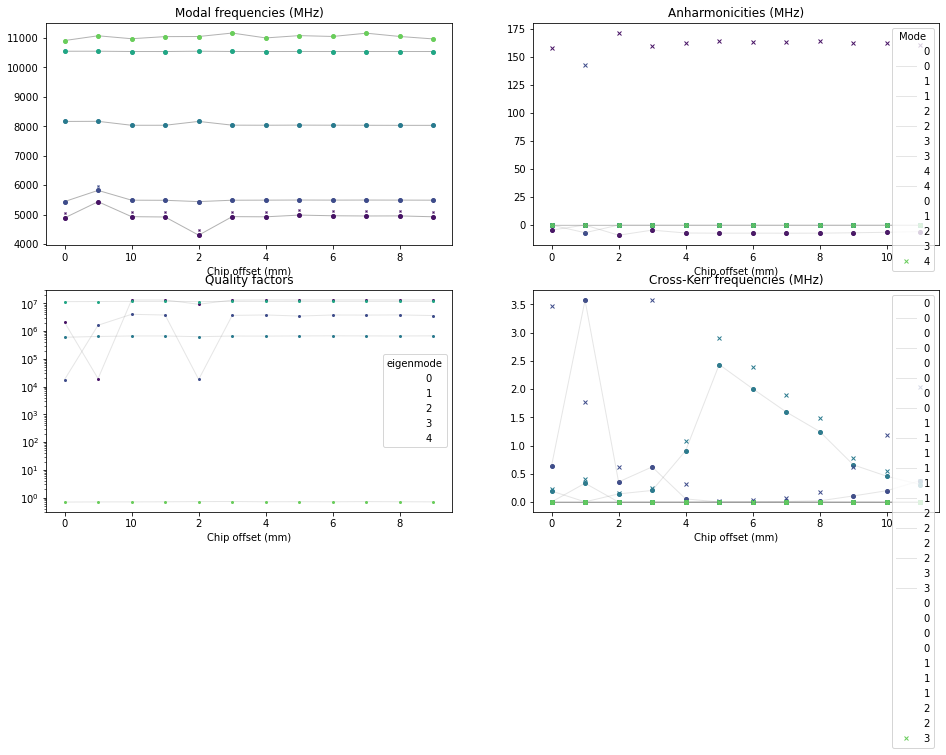

In [38]:
epra.plot_hamiltonian_results(x_label = 'Chip offset (mm)');

In [46]:
np.array(result['1']['chi_O1'])[1,1]

142.2902780398406

In [82]:
result['1'].keys()

odict_keys(['f_0', 'f_1', 'f_ND', 'chi_O1', 'chi_ND', 'ZPF', 'Pm_normed', 'Pm_raw', '_Pm_norm', '_Pm_cap_norm', 'hfss_variables', 'Ljs', 'Cjs', 'Q_coupling', 'Qs', 'fock_trunc', 'cos_trunc'])

In [84]:
result['1']['f_0'][0]

5439.2715886999995

In [50]:
float(eprh.get_variables(str(i))['_LJ'].split('n')[0])

16.39

In [51]:
RO_dis = []
St_dis = []
Anaha = []
C = []
dist = []
RodOffset = []
for i in eprh.variations:
    chi = np.array(result[str(i)]['chi_O1'])
    St_dis.append(chi[0,1])
    RO_dis.append(chi[0,2])
    Anaha.append(chi[0,0])
    LJ = float(eprh.get_variables(str(i))['_LJ'].split('n')[0])
    C.append(10**6/(2*np.pi)**2/(np.array(result[str(i)]['f_0'])[0]/1000)**2/LJ)
    dist.append(float(eprh.get_variables(str(i))['_CenterOffset'].split('m')[0]))
    RodOffset.append(float(eprh.get_variables(str(i))['_rodOffset'].split('m')[0]))
RodOffset = np.array(RodOffset)
dist = np.array(dist)
RO_dis = np.array(RO_dis)
St_dis = np.array(St_dis)
Anaha = np.array(Anaha)
C = np.array(C)

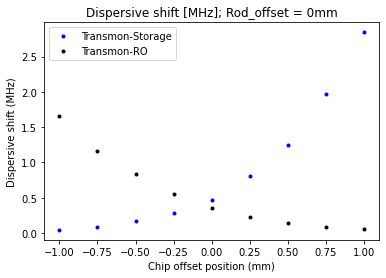

In [52]:
plt.title('Dispersive shift [MHz]; Rod_offset = 0mm')
plt.plot(dist[RodOffset==0], St_dis[RodOffset==0], 'b.',label = 'Transmon-Storage')
plt.plot(dist[RodOffset==0], RO_dis[RodOffset==0], 'k.', label = 'Transmon-RO')
plt.xlabel('Chip offset position (mm)')
plt.ylabel('Dispersive shift (MHz)')
plt.legend()

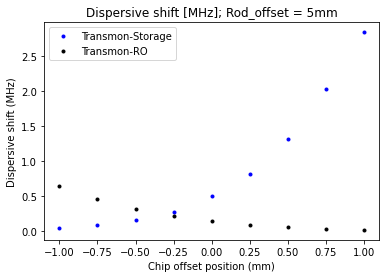

In [53]:
plt.title('Dispersive shift [MHz]; Rod_offset = 5mm')
plt.plot(dist[RodOffset==5], St_dis[RodOffset==5], 'b.',label = 'Transmon-Storage')
plt.plot(dist[RodOffset==5], RO_dis[RodOffset==5], 'k.', label = 'Transmon-RO')
plt.xlabel('Chip offset position (mm)')
plt.ylabel('Dispersive shift (MHz)')
plt.legend()

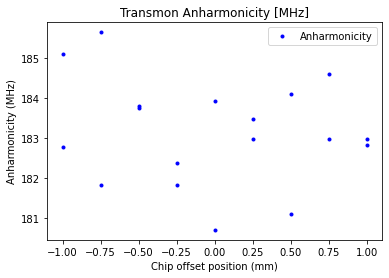

In [54]:
plt.title('Transmon Anharmonicity [MHz]')
plt.plot(dist, Anaha, 'b.',label = 'Anharmonicity')
plt.xlabel('Chip offset position (mm)')
plt.ylabel('Anharmonicity (MHz)')
plt.legend()

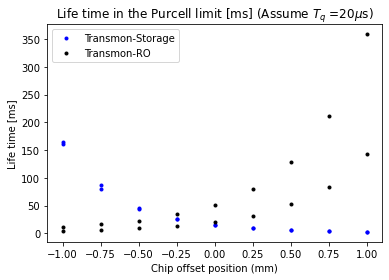

In [55]:
plt.title(r'Life time in the Purcell limit [ms] (Assume $T_q$ =20$\mu$s)')
plt.plot(dist, 2*np.array(Anaha)/np.array(St_dis)*20/1000, 'b.',label = 'Transmon-Storage')
plt.plot(dist, 2*np.array(Anaha)/np.array(RO_dis)*20/1000, 'k.', label = 'Transmon-RO')
plt.xlabel('Chip offset position (mm)')
plt.ylabel(r'Life time [ms]')
plt.legend()

In [56]:
T_pSt = 2*np.array(Anaha)/np.array(St_dis)*20/1000
T_pRO = 2*np.array(Anaha)/np.array(RO_dis)*20/1000

In [57]:
Lj = 16.39*np.ones(len(T_pSt))
C = np.array(C)
EJ = Convert.Ej_from_Lj(Lj, 'nH', "GHz")
EC = Convert.Ec_from_Cs(C, 'fF', "MHz")

In [58]:
d = {'dist': dist, 'Rod offset': RodOffset, 'LJ [nH]':Lj,'C [fF]':C, 'EJ [GHz]':EJ, 'EC [MHz]':EC, 'EJ/EC':EJ/EC*1000, 'Alpha [MHz]':Anaha, 'Chi_RO [MHz]':RO_dis, 'Chi_Storage [MHz]':St_dis,'Purcell_Storage [ms]': T_pSt, 'Purcell_RO [ms]': T_pRO}
pf = pd.DataFrame(data = d)

In [59]:
pf

,dist,Rod offset,LJ [nH],C [fF],EJ [GHz],EC [MHz],EJ/EC,Alpha [MHz],Chi_RO [MHz],Chi_Storage [MHz],Purcell_Storage [ms],Purcell_RO [ms]
0,-0.25,0.0,16.39,94.042953,9.973247,205.972150,48.420365,182.374091,0.548811,0.286391,25.472006,13.292309
1,-0.25,5.0,16.39,94.582753,9.973247,204.796633,48.698294,181.820615,0.212979,0.280823,25.898210,34.148077
2,-1.00,5.0,16.39,92.716649,9.973247,208.918565,47.737484,185.106310,0.640770,0.045956,161.114897,11.555235
3,-0.75,5.0,16.39,92.456383,9.973247,209.506675,47.603479,185.651997,0.464900,0.092199,80.543774,15.973486
4,-0.50,5.0,16.39,93.480575,9.973247,207.211276,48.130811,183.817637,0.320463,0.163661,44.926564,22.943977
5,0.00,5.0,16.39,93.321998,9.973247,207.563380,48.049163,183.932228,0.143210,0.506149,14.535819,51.374121
6,0.25,5.0,16.39,93.474568,9.973247,207.224593,48.127718,183.488494,0.091257,0.817276,8.980487,80.427522
7,0.50,5.0,16.39,92.930472,9.973247,208.437866,47.847576,184.115300,0.057138,1.318738,5.584593,128.892018
8,0.75,5.0,16.39,92.348609,9.973247,209.751175,47.547989,184.603691,0.034795,2.032481,3.633070,212.220441
9,1.00,5.0,16.39,92.965027,9.973247,208.360391,47.865367,182.826528,0.020394,2.840242,2.574802,358.581800


In [ ]:
temp = np.zeros([len(result.keys()),4])
for i in result.keys():
    result['1']

In [ ]:
temp = result['1']
np.array(temp['f_0'])

## <div style="background:#BBFABB;line-height:2em;"> Swept variable analysis driven thorugh pyEPR:<br> Sweep variable in hfss, analyze microwaves, then analyze quantum<div>

Let us now run a more complicated example, where we will sweep $L_j$. This demonstrates some of the `pyEPR` funcationality. 

**Classical microwave, distributed analysis**

Sweep variable in HFSS, run circuits

**EPR mw analysis**

Classical-to-quantum bridge. 

In [ ]:
eprh = epr.DistributedAnalysis(pinfo) # epr hfss analysis 
eprh.hfss_report_full_convergence()

In [ ]:
# Do EPR analysis for all modes and all variations 
eprh.do_EPR_analysis();

**Quantum analysis** 

Perform the analysis and plot the results.

In [ ]:
# This is the core object for working with post processing data from HFSS
# This will load the saved solutions from above
epra = epr.QuantumAnalysis(eprh.data_filename)

In [ ]:
# Analyze 
epra.analyze_all_variations(cos_trunc = 8, fock_trunc = 15);

In [ ]:
#Custom sort of columns
def do_sort_index(df:pd.DataFrame):
    if isinstance(df, pd.DataFrame):
        df.columns = df.columns.astype(float)
        return df.sort_index(axis=1)
    else:
        return df

epra.results.do_sort_index = do_sort_index
df = epra.results.get_frequencies_HFSS(vs='Lj_1')
df

In [ ]:
epra.results.sort_index = True
epra.plot_hamiltonian_results(swp_variable='Lj_1');

There is some jitter, since we have have run some of the runs to only a few passes here.

Please see Part II of the tutorial to continue. You will find it in the tutorial folder as a jupyter notebook. 

In [ ]:
epra.quick_plot_mode(0,0,1,numeric=True,swp_variable='Lj_1')

In [ ]:
swp_variable = 'Lj_1'
epra.report_results(swp_variable=swp_variable, numeric=True)